-------------------------------------

Input to a neuron is a continuous signal.

Input to virtual synapse is a continuous signal

Input to a synapse is always spikes

-------------------------------------
Each time step
VIRTUAL SYNAPSE - For continuous inputs.
Read input
Update state
Update output matrix


SYNAPSE - For spike inputs.
check for spike
update state
Update output matrix


NEURON
Read input matrix
Update state
Spike condition
Update state
Update spike matrix


In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from spiker import *

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Step time =  1e-06
Time constant =  0.0018465707874685765
Gain =  1.0


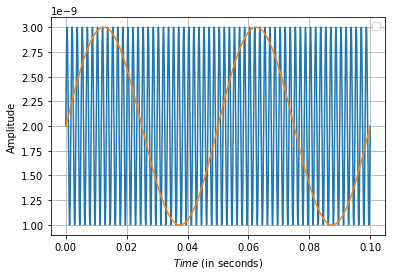

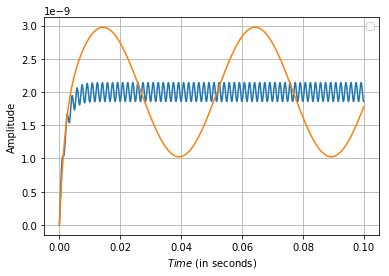

In [2]:
# Test bench for Vsyn
if (1):
    Ts = 1e-6
    tstart = 0
    tstop = 0.1
    tseries = gen_time(tstart,tstop,Ts)
    
    ip0  = gen_sine(tseries,600)
    ip1  = gen_sine(tseries,20)
    ipt = np.vstack((ip0.value,ip1.value))
    test = np.zeros_like(ipt)
    
    v = Vsyn(2,Ts=Ts)
    for index in range(len(tseries.time)):
        ip = ipt[:,index]
        test[:,index] = v.rd_upd(ip)
    tx0 = Tseries(test[0,:],tseries.time,Ts)
    tx1 = Tseries(test[1,:],tseries.time,Ts)
    ip0.plot()
    ip1.plot()
    plt.figure()
    tx0.plot()
    tx1.plot()
    v.print_props()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Step time =  1e-06
Time constant =  0.0018465707874685765
Gain =  1.0


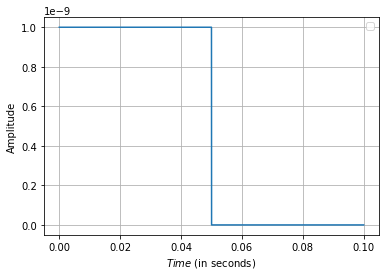

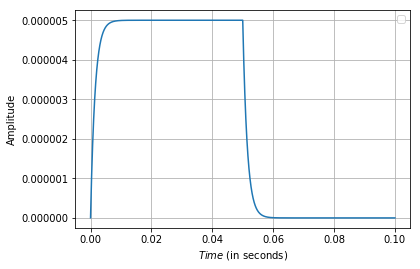

In [3]:
# TB for synapse
if (1):
    Ts = 1e-6
    tstart = 0
    tstop = 0.1
    tseries = gen_time(tstart,tstop,Ts)
    ipt  = gen_ptrain(tseries,f=10)
    test = np.zeros_like(tseries.time)
    ipt.set_time(0.)
    s = Syn(1,Ts=Ts)
    for index in range(len(tseries.time)):
        ip = ipt.value[index]
        test[index] = s.rd_upd(ip)
    tx = Tseries(test,tseries.time,Ts)
    ipt.plot()
    plt.figure()
    tx.plot()
    v.print_props()

Number of spikes = 242.0
Spike rate = 484.0 Hz
------------------

Neuron properties

Delta =  [1.e-07]
Step time =  1e-06
------------------

Input DPI properties

Step time =  1e-06
Time constant =  0.014772566299748612
Gain =  1.0
------------------

Feedback DPI properties

Step time =  1e-06
Time constant =  0.014772566299748612
Gain =  1.0
b =  [2.70763017e-10]
------------------

Error DPI properties

Step time =  1e-06
Time constant =  0.007386283149874306
Gain =  5000.0


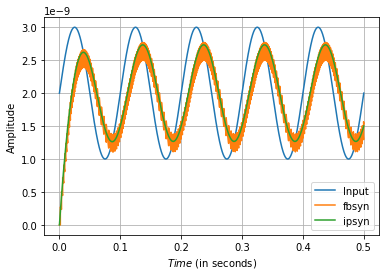

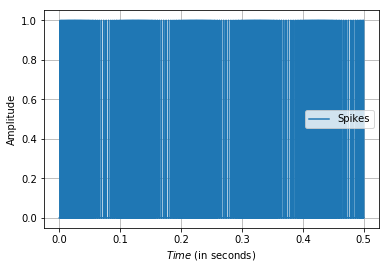

In [10]:
# Test bench for Neuron
if (1):
    Ts = 1e-6
    tstart = 0
    tstop = 0.5
    tseries = gen_time(tstart,tstop,Ts)
    ipt  = gen_sine(tseries,10)
    test = np.zeros_like(tseries.time)#.astype(np.bool_)
    test0 = np.zeros_like(tseries.time)#.astype(np.bool_)
    test1 = np.zeros_like(tseries.time)#.astype(np.bool_)
    ipt.set_time(0.)
    
    nItau    = 5e-12
    nIth     = 5e-12
    nfbItau  = 5e-12
    nfbIth   = 5e-12
    nfbIin   = 4e-6
    neItau   = 10e-12
    neIth    = 50e-9
    
    n = Neuron(1,
             ipItau  = nItau,
             ipIth   = nIth,
             fbItau  = nfbItau,
             fbIth   = nfbIth,
             fbIin   = nfbIin,
             eItau   = neItau,
             eIth    = neIth,
             thresh  = 1e-7,
             Ts=Ts)
    
    for index in range(len(tseries.time)):
        ip = ipt.value[index]
        n.rd_upd(ip)
        test[index]  = n.fbsyn.states
        test0[index] = n.ipsyn.states
        test1[index] = n.states

    print('Number of spikes = {}'.format(np.sum(test1)))
    print('Spike rate = {} Hz'.format(np.sum(test1/tstop)))

    tx = Tseries(test,tseries.time,Ts)
    tx0 = Tseries(test0,tseries.time,Ts)    
    tx1 = Tseries(test1,tseries.time,Ts)
    start= 0.00
    stop = None
    ipt.plot(start,stop,"Input")
    tx.plot(start,stop,"fbsyn")
    tx0.plot(start,stop,"ipsyn")
    plt.figure()
    tx1.plot(start,stop,"Spikes")
    n.print_props()

